In [1]:
!pip install tweepy
!pip install pymongo
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime



In [2]:
api_key = "1dSWQ7sR4VzVcx0GmLBZwLN7t" # <---- Add your API Key
api_secret = "ngma3SLArKBPgtTAu5RP88SwBpKPVZhUSwhAsFHP4Dw0c0zu56" # <---- Add your API Secret
access_token = "1089121501897342977-4t0Rv3crUu6kDTOInQKJfeQeX0WCtq" # <---- Add your access token
access_token_secret = "hpr7WwHndEwFhd68XjCsKpMLBkIGraAv5TRmUNU5QKGL3" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["americanelection"]["joebiden"]
col.count()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


0

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Joe Biden",
            "Build Back Better","Biden-Harris"
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:09:24.783590
Tweets/Sec: 8.9
Tweets collected: 5000
Total tweets in collection: 5000


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [4]:
col.find_one()

{'_id': ObjectId('5f8abc0ea39fdfee9944692b'),
 'created_at': 'Sat Oct 17 09:40:24 +0000 2020',
 'id': 1317400059533811712,
 'id_str': '1317400059533811712',
 'text': 'RT @ScottAdamsSays: Fact Check: False. Trump\'s actual words, as he went on to clarify, unprompted, were "And I\'m not talking about the neo-…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 823434812572762112,
  'id_str': '823434812572762112',
  'name': 'Virus Joe \U0001f7e7',
  'screen_name': 'VirusJoeKnows',
  'location': None,
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 601,
  'friends_count': 846,
  'listed_count': 9,
  'favourites_count': 65845,
  'statuses_count': 169525,
  'creat

In [5]:

dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Sat Oct 17 09:40:24 +0000 2020,RT @ScottAdamsSays: Fact Check: False. Trump's...,@VirusJoeKnows,"<a href=""http://twitter.com/download/iphone"" r...",en
1,Sat Oct 17 09:40:25 +0000 2020,RT @PhilipWegmann: Holy Smokes: “One of the pe...,@KathyAl26063280,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
2,Sat Oct 17 09:40:25 +0000 2020,RT @CitizensAR: Text messages show raw and int...,@LeeksDry,"<a href=""http://twitter.com/download/iphone"" r...",en
3,Sat Oct 17 09:40:25 +0000 2020,RT @RealJamesWoods: The size of this thing!,@ANXIcod,"<a href=""http://twitter.com/download/iphone"" r...",en
4,Sat Oct 17 09:40:25 +0000 2020,RT @JasonMillerinDC: “I have no response.” - J...,@hoopes_leah,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
...,...,...,...,...,...
4995,Sat Oct 17 09:49:48 +0000 2020,RT @charliekirk11: Joe Biden &amp; Kamala Harr...,@memphis8992,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
4996,Sat Oct 17 09:49:48 +0000 2020,أعلنت حملة بايدن أن الرئيس أوباما سينضم إلى ال...,@smattsa,"<a href=""http://twitter.com/download/android"" ...",ar
4997,Sat Oct 17 09:49:48 +0000 2020,RT @RealJamesWoods: The Washington Post has be...,@DJNavy87,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
4998,Sat Oct 17 09:49:48 +0000 2020,RT @oliverdarcy: Hard to stress how far into o...,@stevembrew,"<a href=""http://twitter.com/download/iphone"" r...",en


In [6]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,4495
1,biden,3791
2,the,3403
3,joe,2915
4,to,1582
5,is,1530
6,for,1315
7,and,1204
8,of,1120
9,https,1048


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Twitter for Mac               2
TweetCaster for Android       4
Mobile Web (M2)               4
TweetDeck                     4
IFTTT                         4
Swat.io                      12
Twitter for iPad            336
Twitter Web App            1016
Twitter for Android        1707
Twitter for iPhone         1884
Name: source, dtype: int64

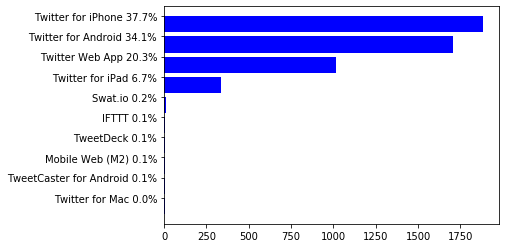

In [7]:

def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

pl        8
zh        9
fr        9
nl       15
de       25
es       43
ja       62
pt       92
und     136
en     4580
Name: lang, dtype: int64

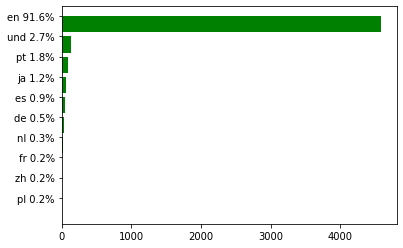

In [8]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [9]:

from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [10]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1317400059533811712,RT @ScottAdamsSays: Fact Check: False. Trump's...,en
1,1317400060221661190,RT @PhilipWegmann: Holy Smokes: “One of the pe...,en
2,1317400060573880320,RT @CitizensAR: Text messages show raw and int...,en
3,1317400060532002817,RT @RealJamesWoods: The size of this thing!,en
4,1317400060771110913,RT @JasonMillerinDC: “I have no response.” - J...,en
...,...,...,...
4994,1317402423305043969,RT @seanmdav: After corruptly blocking readers...,en
4995,1317402423527264256,RT @charliekirk11: Joe Biden &amp; Kamala Harr...,en
4997,1317402424211050497,RT @RealJamesWoods: The Washington Post has be...,en
4998,1317402425012244481,RT @oliverdarcy: Hard to stress how far into o...,en


In [11]:
!pip install textblob
from  textblob import TextBlob


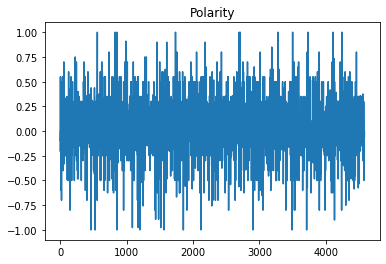

In [12]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

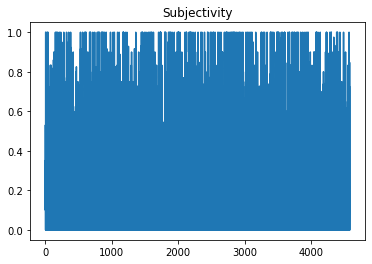

In [13]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [14]:
import statistics
statistics.mean(poltweet.polarity)

0.025459598115732975

In [15]:
import statistics
statistics.mean(poltweet.subjectivity)

0.27208862838802794